In [57]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBRegressor, plot_importance
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
plt.style.use('default')


In [6]:
df = pd.read_csv("CarvanaClean.csv")

In [7]:
df.head()

,Unnamed: 0,model,details,mileage,Bluetooth,Backup Camera,Infotainment,Screen,Navigation,Hands Free Calling,...,4-Cyl,3-Cyl,V6,V8,6-Cyl,city_mpg,highway_mpg,price,year,make
0,0,Altima,2.5 SR,57543,1,1,1,0,0,1,...,1,0,0,0,0,26,37,19990,2016,Nissan
1,1,Civic,LX,51210,0,0,1,0,0,0,...,1,0,0,0,0,25,36,16990,2011,Honda
2,2,Focus,Titanium,19216,1,1,1,0,0,0,...,1,0,0,0,0,26,38,21990,2016,Ford
3,3,Passat,1.8T Wolfsburg Edition,54167,1,0,1,0,0,1,...,1,0,0,0,0,24,34,17590,2014,Volkswagen
4,4,EcoSport,S,11168,1,1,1,0,0,0,...,1,0,0,0,0,23,29,23990,2021,Ford


In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
# df.drop(['Bluetooth', 'Backup Camera', 'Infotainment', 'Screen', 'Navigation', 'Hands Free Calling', 'Heated Seats', 'Power Seat Controls', 'Rear Air Vents', 'Bed Liner', 'Tow Hitch', 'details'], inplace=True, axis=1)

In [10]:
# df.drop(['Bluetooth', 'Backup Camera', 'Infotainment', 'Screen', 'Navigation', 'Hands Free Calling', 'Heated Seats', 'Power Seat Controls', 'Rear Air Vents', 'Bed Liner', 'Tow Hitch', '4-Cyl', '3-Cyl', 'V6', 'V8', '6-Cyl', 'details'], inplace=True, axis=1)

In [11]:
df.columns

Index(['model', 'details', 'mileage', 'Bluetooth', 'Backup Camera',
       'Infotainment', 'Screen', 'Navigation', 'Hands Free Calling',
       'Heated Seats', 'Power Seat Controls', 'Rear Air Vents', 'Bed Liner',
       'Tow Hitch', '4-Cyl', '3-Cyl', 'V6', 'V8', '6-Cyl', 'city_mpg',
       'highway_mpg', 'price', 'year', 'make'],
      dtype='object')

In [12]:
len(df)

7294

In [13]:
df.head()

,model,details,mileage,Bluetooth,Backup Camera,Infotainment,Screen,Navigation,Hands Free Calling,Heated Seats,...,4-Cyl,3-Cyl,V6,V8,6-Cyl,city_mpg,highway_mpg,price,year,make
0,Altima,2.5 SR,57543,1,1,1,0,0,1,0,...,1,0,0,0,0,26,37,19990,2016,Nissan
1,Civic,LX,51210,0,0,1,0,0,0,0,...,1,0,0,0,0,25,36,16990,2011,Honda
2,Focus,Titanium,19216,1,1,1,0,0,0,1,...,1,0,0,0,0,26,38,21990,2016,Ford
3,Passat,1.8T Wolfsburg Edition,54167,1,0,1,0,0,1,1,...,1,0,0,0,0,24,34,17590,2014,Volkswagen
4,EcoSport,S,11168,1,1,1,0,0,0,0,...,1,0,0,0,0,23,29,23990,2021,Ford


In [14]:
df_dummies = pd.get_dummies(df, drop_first=True)

In [15]:
len(df_dummies.columns)

1312

In [16]:
X = df_dummies.drop('price', axis=1).to_numpy()
y = df_dummies['price'].to_numpy()
X = StandardScaler().fit_transform(X)
pca = PCA(n_components=10)

pca_X = pca.fit_transform(X)
pca_df = pd.DataFrame(data= pca_X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
len(df_dummies.columns)

1312

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
params = {
    'learning_rate': np.linspace(0, 1, 10),
    'max_depth': np.arange(2, 10, 2),
    'n_estimators': np.arange(0, 300, 25),
}

In [16]:
xgb = XGBRegressor()

In [17]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [18]:
preds = xgb.predict(X_test)

In [19]:
RMSE = np.sqrt(mean_squared_error(y_test, preds))

In [20]:
RMSE

3448.7612690844267

In [21]:
MAE = mean_absolute_error(y_test, preds)

In [22]:
MAE

2052.3952956327107

In [23]:
cv = GridSearchCV(XGBRegressor(), param_grid=params, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=3, verbose=1)
cv.fit(X_train, y_train)
print(cv.best_params_)
print(cv.best_score_)
best_score = str(cv.best_score_)

with open('xgb_params_list.txt', 'a') as file:
    file.write("--XGBREGRESSOR--")
    file.write("\n")
    for key,value in cv.best_params_.items():
        file.write(key + ": " + str(value))
        file.write("\n")
    file.write("Best RMSE Score: " + best_score)
    file.write("\n")
    file.write("----------------------------------")
    file.write("\n")
    file.close()

Fitting 3 folds for each of 480 candidates, totalling 1440 fits
{'learning_rate': 0.3333333333333333, 'max_depth': 4, 'n_estimators': 275}
-3270.2393236700227


In [25]:
with open('xgb_params_list.txt', 'r') as file:
    for line in file.readlines():
        print(line)

--XGBREGRESSOR--

learning_rate: 0.3333333333333333

max_depth: 4

n_estimators: 275

Best RMSE Score: -3270.2393236700227

----------------------------------



In [26]:
preds = cv.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: -- ", RMSE)

RMSE: --  3288.1212172408723


In [1]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
from sklearn.model_selection import RandomizedSearchCV

In [22]:
rf_cv = RandomizedSearchCV(RandomForestRegressor(), param_distributions={'max_depth': range(1, 20), 'n_estimators': range(1,250, 10)}, n_jobs=-1, n_iter=1000, verbose=1, scoring='neg_root_mean_squared_error', cv=3)

In [23]:
rf_cv.fit(X_train, y_train)

c:\Users\adrie\GitHub\Car-Appraisal-Master\venv\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 475 is smaller than n_iter=1000. Running 475 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 475 candidates, totalling 1425 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=1000,
                   n_jobs=-1,
                   param_distributions={'max_depth': range(1, 20),
                                        'n_estimators': range(1, 250, 10)},
                   scoring='neg_root_mean_squared_error', verbose=1)

In [25]:
print(rf_cv.best_params_)
print(rf_cv.best_score_)
best_score = str(rf_cv.best_score_)

with open('rf_params_list.txt', 'a') as file:
    file.write("--RandomForestRegressor--")
    file.write("\n")
    for key,value in rf_cv.best_params_.items():
        file.write(key + ": " + str(value))
        file.write("\n")
    file.write("Best RMSE Score: " + best_score)
    file.write("\n")
    file.write("----------------------------------")
    file.write("\n")
    file.close()

{'n_estimators': 161, 'max_depth': 18}
-3797.495401462342


In [ ]:
# Here I will begin the Tensorflow workflow from the top

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

In [27]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)


In [28]:
X = df_dummies.drop('price', axis=1).to_numpy()
y = df_dummies['price'].to_numpy()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
checkpoint = ModelCheckpoint('./checkpoints', monitor="mean_absolute_error", verbose=1, save_best_only=True, save_weights_only=True, mode="auto")

In [31]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [32]:
normalizer.adapt(X_train)


In [33]:
linear_model = Sequential([
    normalizer,
    Dense(64, activation='relu'),
    Dropout(.5),
    Dense(64, activation='relu'),
    Dropout(.5),
    Dense(64, activation='relu'),
    Dropout(.5),
    Dense(1)
])

In [34]:
linear_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mean_absolute_error', metrics=['mean_absolute_error'])

In [35]:
history = linear_model.fit(X_train, y_train, epochs=500, verbose=1, validation_split=.2, callbacks=[checkpoint])

Epoch 1/500
142/146 [============================>.] - ETA: 0s - loss: 13408.2637 - mean_absolute_error: 13408.2637
Epoch 1: mean_absolute_error improved from inf to 13386.61914, saving model to .\checkpoints
146/146 [==============================] - 1s 5ms/step - loss: 13386.6191 - mean_absolute_error: 13386.6191 - val_loss: 10285.3604 - val_mean_absolute_error: 10285.3604
Epoch 2/500
142/146 [============================>.] - ETA: 0s - loss: 10864.4658 - mean_absolute_error: 10864.4658
Epoch 2: mean_absolute_error improved from 13386.61914 to 10854.88184, saving model to .\checkpoints
146/146 [==============================] - 1s 4ms/step - loss: 10854.8818 - mean_absolute_error: 10854.8818 - val_loss: 9237.7754 - val_mean_absolute_error: 9237.7754
Epoch 3/500
130/146 [=========================>....] - ETA: 0s - loss: 11443.8623 - mean_absolute_error: 11443.8623
Epoch 3: mean_absolute_error did not improve from 10854.88184
146/146 [==============================] - 0s 3ms/step - los

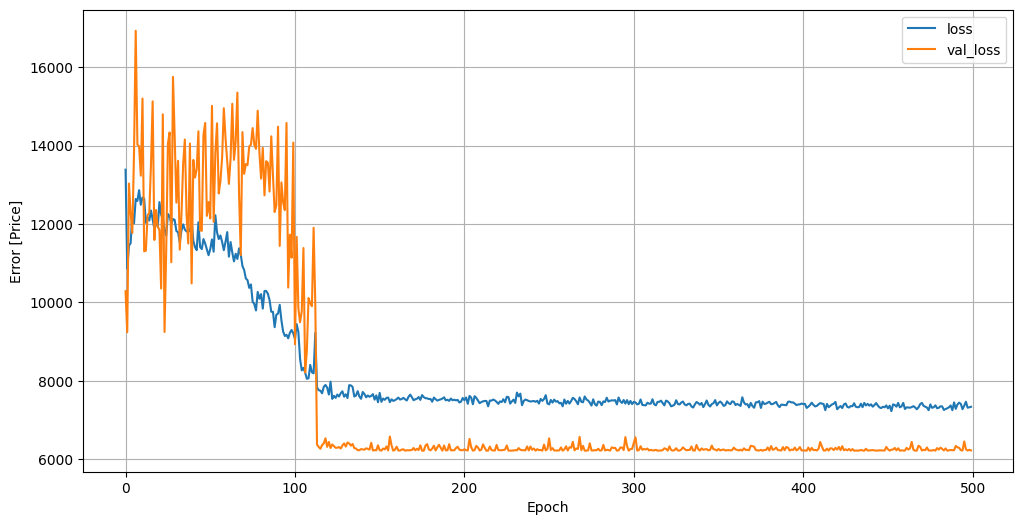

In [58]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [Price]')
plt.legend()

plt.grid(True)

In [59]:
linear_model.evaluate(X_test, y_test)

46/46 [==============================] - 0s 1ms/step - loss: 6679.8013 - mean_absolute_error: 6679.8013


[6679.80126953125, 6679.80126953125]

In [60]:
preds = linear_model.predict(X_test)

In [61]:
MAE = mean_absolute_error(y_test, preds)

In [62]:
MAE

6679.800715654987